# Replace missing dates in IMS dataset
- 2018: NA
- 2019: NA
- 2020: 1 day missing (May 12), from visualization will make copy of May 13
- 2021: 2 days missing (Jan 2 and 3), from visualization will make Jan 2 a copy of Jan 1 and Jan 3 a copy of Jan 4
- 2022: NA
- 2023: NA

In [1]:
from dask.distributed import LocalCluster
import pandas as pd

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/DataAccess/Utilities')
import PreProcess_Utils as pputil

sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Modelling/Utilities')
import Snow_Utils as snow_util

sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Visualization/Utilities')
import Viz_Utils as vutil

In [2]:
cluster = LocalCluster(n_workers = 10, threads_per_worker = 10) # Refined through testing
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 100,Total memory: 127.65 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:52244,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 100
Started: Just now,Total memory: 127.65 GiB
Comm: tcp://127.0.0.1:52306,Total threads: 10
Dashboard: http://127.0.0.1:52313/status,Memory: 12.77 GiB
Nanny: tcp://127.0.0.1:52247,


## 2020
- Reindex (bfill May 13 to May 12)
- Save full daily cube (will replace original)

In [8]:
%%time
ims = pputil.uploadNC('D:/Canada/IMS/IMS_2020.nc', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
ims

CPU times: total: 15.6 ms
Wall time: 20.6 ms


<xarray.DataArray (time: 365, y: 4568, x: 5372)> Size: 9GB
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(365, 4568, 5372), dtype=uint8, chunksize=(1, 4568, 5372), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 43kB -2.351e+06 -2.35e+06 ... 3.019e+06 3.02e+06
  * y            (y) float64 37kB 3.843e+06 3.842e+06 ... -7.229e+05 -7.239e+05
    variable     <U18 72B ...
  * time         (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
    spatial_ref  int64 8B ...
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    23 July 2021 19:37Z: NetCDF file generated fr...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

In [9]:
time_index = pd.date_range(start = '01/01/2020', end = '12/31/2020') # All Days possible in cube
time_index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [10]:
%%time
ims = ims.reindex({'time': time_index}, method = 'bfill') # Take May 13 and apply back to May 12
ims

CPU times: total: 31.2 ms
Wall time: 12.1 ms


<xarray.DataArray (time: 366, y: 4568, x: 5372)> Size: 9GB
dask.array<getitem, shape=(366, 4568, 5372), dtype=uint8, chunksize=(2, 4568, 5372), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 43kB -2.351e+06 -2.35e+06 ... 3.019e+06 3.02e+06
  * y            (y) float64 37kB 3.843e+06 3.842e+06 ... -7.229e+05 -7.239e+05
  * time         (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
    variable     <U18 72B ...
    spatial_ref  int64 8B ...
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    23 July 2021 19:37Z: NetCDF file generated fr...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

In [11]:
%%time
load = pputil.loadXR(ims[130:135,:,:])
load

CPU times: total: 1.62 s
Wall time: 2.76 s


<xarray.DataArray (time: 5, y: 4568, x: 5372)> Size: 123MB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
Coordinates:
  * x            (x) float64 43kB -2.351e+06 -2.35e+06 ... 3.019e+06 3.02e+06
  * y            (y) float64 37kB 3.843e+06 3.842e+06 ... -7.229e+05 -7.239e+05
  * time         (time) datetime64[ns] 40B 2020-05-10 2020-05-11 ... 2020-05-14
    variable     <U18 72B 'IMS_Surface_Values'
    spatial_ref  int64 8B 0
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    23 July 2021 19:37Z: NetCDF file generated fr...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

---------------------------------------------------------------------------------------------------------------------------
Water = Dark Blue | Land = Dark Green | Ice = Light Blue | Snow = Gray
Outside ROI = White
---------------------------------------------------------------------------------------------------------------------------
CPU times: total: 2.2 s
Wall time: 2.25 s


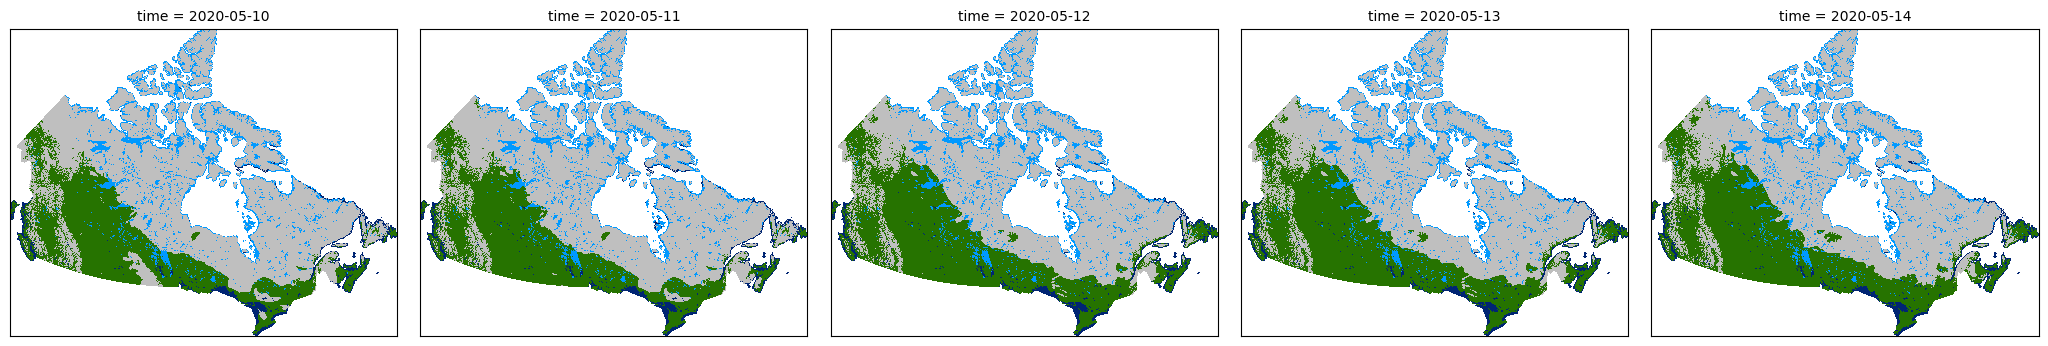

In [12]:
%%time
vutil.matrixPlot(load, sat = '', type = 'ims')

In [14]:
%%time
# Save updated annual IMS cube
pputil.downloadNC(ims, 'D:/Canada/IMS', 'IMS_2020_1.nc', type = '')

CPU times: total: 25.1 s
Wall time: 44.5 s


## 2021
- Reindex (nearest to fill in consecutivie missing Jan dates)
- Save full daily cube (will replace original)

In [15]:
%%time
ims = pputil.uploadNC('D:/Canada/IMS/IMS_2021.nc', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
ims

CPU times: total: 31.2 ms
Wall time: 43.3 ms


<xarray.DataArray (time: 363, y: 4568, x: 5372)> Size: 9GB
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(363, 4568, 5372), dtype=uint8, chunksize=(1, 4568, 5372), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 43kB -2.351e+06 -2.35e+06 ... 3.019e+06 3.02e+06
  * y            (y) float64 37kB 3.843e+06 3.842e+06 ... -7.229e+05 -7.239e+05
  * time         (time) datetime64[ns] 3kB 2021-01-01 2021-01-04 ... 2021-12-31
    variable     <U18 72B ...
    spatial_ref  int64 8B ...
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    26 July 2021 19:50Z: NetCDF file generated fr...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

In [16]:
time_index = pd.date_range(start = '01/01/2021', end = '12/31/2021') # All Days possible in cube
time_index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [17]:
%%time
ims = ims.reindex({'time': time_index}, method = 'nearest') # Jan 2 = Jan 1, Jan 3 = Jan 4
ims

CPU times: total: 15.6 ms
Wall time: 9.96 ms


<xarray.DataArray (time: 365, y: 4568, x: 5372)> Size: 9GB
dask.array<getitem, shape=(365, 4568, 5372), dtype=uint8, chunksize=(2, 4568, 5372), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 43kB -2.351e+06 -2.35e+06 ... 3.019e+06 3.02e+06
  * y            (y) float64 37kB 3.843e+06 3.842e+06 ... -7.229e+05 -7.239e+05
  * time         (time) datetime64[ns] 3kB 2021-01-01 2021-01-02 ... 2021-12-31
    variable     <U18 72B ...
    spatial_ref  int64 8B ...
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    26 July 2021 19:50Z: NetCDF file generated fr...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

In [18]:
%%time
load = pputil.loadXR(ims[0:5,:,:])
load

CPU times: total: 938 ms
Wall time: 1.12 s


<xarray.DataArray (time: 5, y: 4568, x: 5372)> Size: 123MB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
Coordinates:
  * x            (x) float64 43kB -2.351e+06 -2.35e+06 ... 3.019e+06 3.02e+06
  * y            (y) float64 37kB 3.843e+06 3.842e+06 ... -7.229e+05 -7.239e+05
  * time         (time) datetime64[ns] 40B 2021-01-01 2021-01-02 ... 2021-01-05
    variable     <U18 72B 'IMS_Surface_Values'
    spatial_ref  int64 8B 0
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    26 July 2021 19:50Z: NetCDF file generated fr...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

---------------------------------------------------------------------------------------------------------------------------
Water = Dark Blue | Land = Dark Green | Ice = Light Blue | Snow = Gray
Outside ROI = White
---------------------------------------------------------------------------------------------------------------------------
CPU times: total: 2.12 s
Wall time: 2.16 s


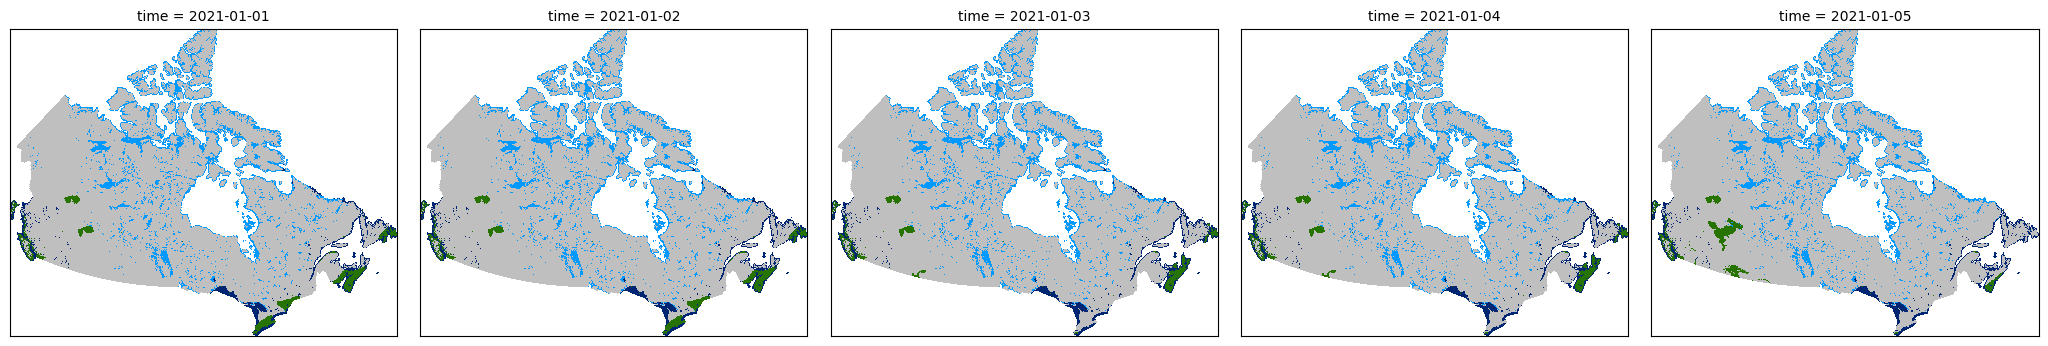

In [19]:
%%time
vutil.matrixPlot(load, sat = '', type = 'ims')

In [20]:
%%time
# Save updated annual IMS cube
pputil.downloadNC(ims, 'D:/Canada/IMS', 'IMS_2021_1.nc', type = '')

CPU times: total: 23.4 s
Wall time: 40.8 s
